In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("C:/Users/ASUS VIVOBOOK/Downloads/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [2]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [3]:
data=pd.get_dummies(data)
data.columns

Index(['User ID', 'Age', 'EstimatedSalary', 'Purchased', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [4]:
x=data[['Age', 'EstimatedSalary','Gender_Female','Gender_Male']]
y=data[ 'Purchased']
print(x)
print(y)

      Age  EstimatedSalary  Gender_Female  Gender_Male
0    19.0          19000.0              0            1
1    35.0          20000.0              0            1
2    26.0          43000.0              1            0
3    27.0          57000.0              1            0
4    19.0          76000.0              0            1
..    ...              ...            ...          ...
395  46.0          41000.0              1            0
396  51.0          23000.0              0            1
397  50.0          20000.0              1            0
398  36.0          33000.0              0            1
399  49.0          36000.0              1            0

[400 rows x 4 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


<AxesSubplot:>

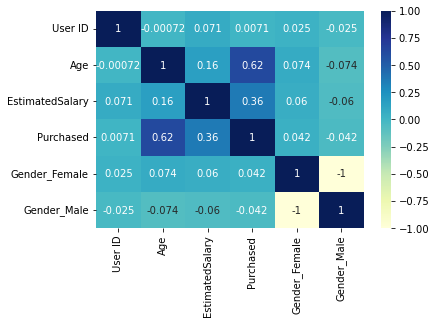

In [6]:
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)

In [11]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500,0.510000,0.490000
std,7.165832e+04,10.482877,34096.960282,0.479864,0.500526,0.500526
min,1.556669e+07,18.000000,15000.000000,0.000000,0.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000,0.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000,1.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000,1.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000,1.000000,1.000000


In [13]:
data=pd.get_dummies(data)

In [14]:
data2

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19.0,19000.0,0,0,1
1,15810944,35.0,20000.0,0,0,1
2,15668575,26.0,43000.0,0,1,0
3,15603246,27.0,57000.0,0,1,0
4,15804002,19.0,76000.0,0,0,1
...,...,...,...,...,...,...
395,15691863,46.0,41000.0,1,1,0
396,15706071,51.0,23000.0,1,0,1
397,15654296,50.0,20000.0,1,1,0
398,15755018,36.0,33000.0,0,0,1


In [15]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [20]:
X=data[['Age', 'EstimatedSalary','Gender_Female','Gender_Male']]
Y=data[ 'Purchased']
print(x)
print(y)

      Age  EstimatedSalary  Gender_Female  Gender_Male
0    19.0          19000.0              0            1
1    35.0          20000.0              0            1
2    26.0          43000.0              1            0
3    27.0          57000.0              1            0
4    19.0          76000.0              0            1
..    ...              ...            ...          ...
395  46.0          41000.0              1            0
396  51.0          23000.0              0            1
397  50.0          20000.0              1            0
398  36.0          33000.0              0            1
399  49.0          36000.0              1            0

[400 rows x 4 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(300, 4)
(100, 4)
(300,)
(100,)


In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [24]:
#Fitting the model

from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=12)
cls.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=12)

In [25]:
#predicting

Y_pred=cls.predict(X_test)

In [26]:
cls.predict_proba(X_test)

array([[0.1, 0.9],
       [0.1, 0.9],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [0.3, 0.7],
       [1. , 0. ],
       [1. , 0. ],
       [0.1, 0.9],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [0.1, 0.9],
       [1. , 0. ],
       [0.1, 0.9],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.1, 0.9],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.1, 0.9],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.1, 0.9],
       [1. , 0. ],
       [0.9, 0.1],
       [0.1, 0.9],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. ,

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [28]:
print(accuracy_score(Y_test,Y_pred))

0.89


In [29]:
print(confusion_matrix(Y_test,Y_pred))

[[56  7]
 [ 4 33]]


In [30]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        63
           1       0.82      0.89      0.86        37

    accuracy                           0.89       100
   macro avg       0.88      0.89      0.88       100
weighted avg       0.89      0.89      0.89       100



In [31]:
#roc_curve nd roc_auc_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
